In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rich=pd.read_csv("D:\\2022_forbes_billionaires.csv")
rich.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [49]:
rich.tail()

,Unnamed: 0,rank,name,networth,age,country,source,industry
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [50]:
rich.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [51]:
rich.duplicated().sum()

np.int64(0)

In [52]:
rich.shape

(2600, 8)

In [53]:
rich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [54]:
rich.describe()

,Unnamed: 0,rank,age
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,64.271923
std,750.699674,728.146364,13.220607
min,0.000000,1.000000,19.000000
25%,649.750000,637.000000,55.000000
50%,1299.500000,1292.000000,64.000000
75%,1949.250000,1929.000000,74.000000
max,2599.000000,2578.000000,100.000000


In [55]:
rich.dtypes


Unnamed: 0     int64
rank           int64
name          object
networth      object
age            int64
country       object
source        object
industry      object
dtype: object

<Axes: xlabel='age'>

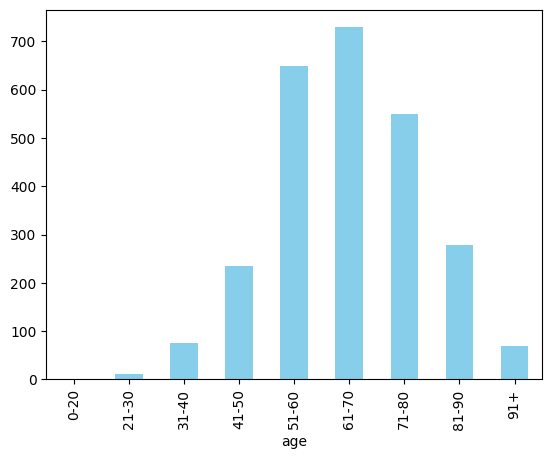

In [56]:
#show the age distribution among the data using bar plot.
bins=[0,20,30,40,50,60,70,80,90,100]
labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91+']
ages=pd.cut(rich['age'], bins=bins, labels=labels, right=False)
a=ages.value_counts(sort=False)
a.plot(kind='bar', color='skyblue')

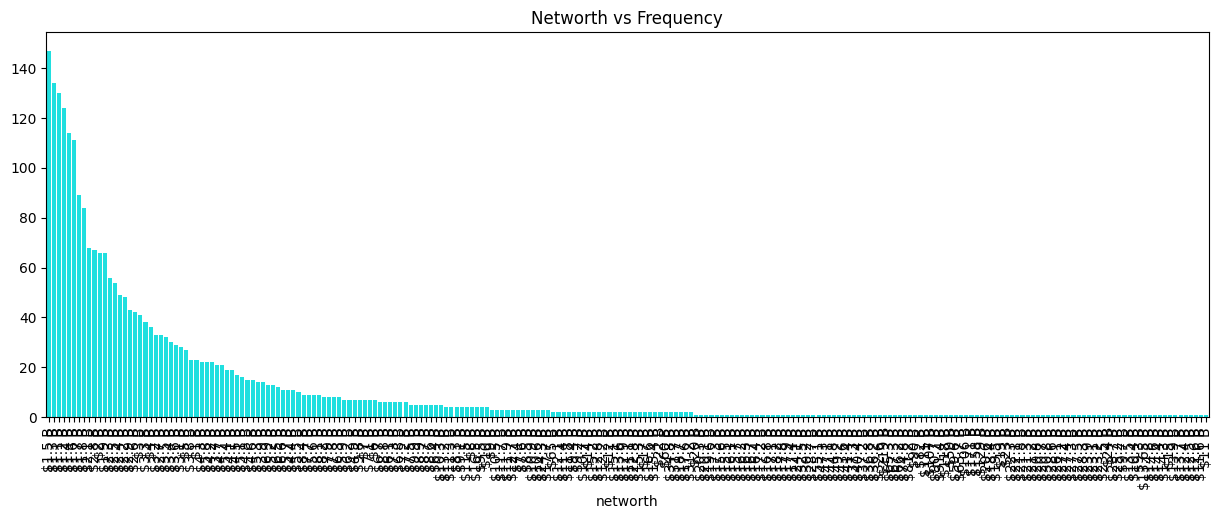

In [57]:
#Show the networth VS Frequency using bar plot.
plt.figure(figsize=(15,5))
networth=rich['networth'].value_counts()
sns.barplot(x=networth.index,y=networth.values, color='cyan')
plt.title("Networth vs Frequency")
plt.xticks(rotation=90)
plt.show()

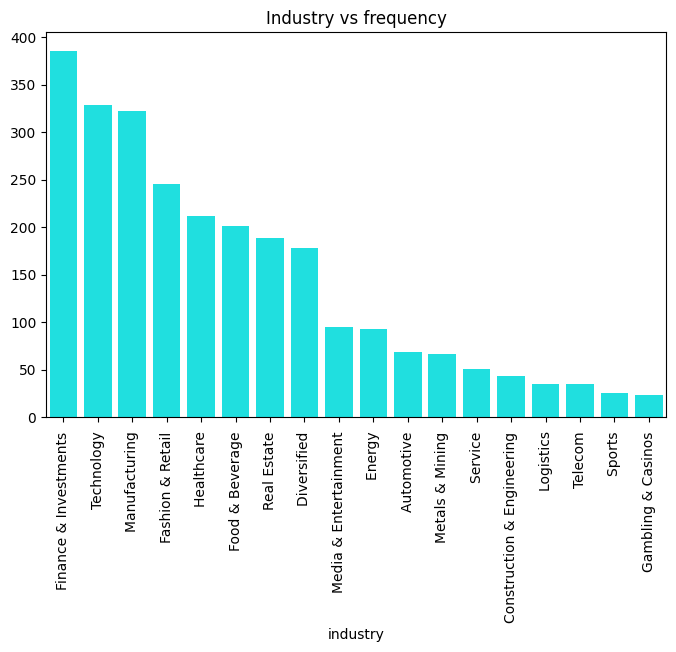

In [58]:
#Show Industry vs Frequency using bar plot.
plt.figure(figsize=(8,5))
industry=rich['industry'].value_counts()
sns.barplot(x=industry.index,y=industry.values, color='cyan')
plt.title("Industry vs frequency")
plt.xticks(rotation=90)
plt.show()

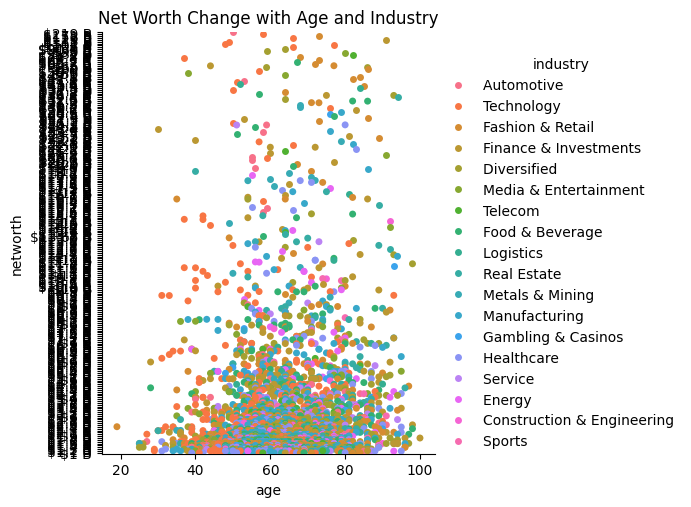

In [59]:
#Shoe how Networth change with AGe and Industry using cat plot
sns.catplot(rich,x='age', y='networth', hue='industry')
plt.title('Net Worth Change with Age and Industry')
plt.show()

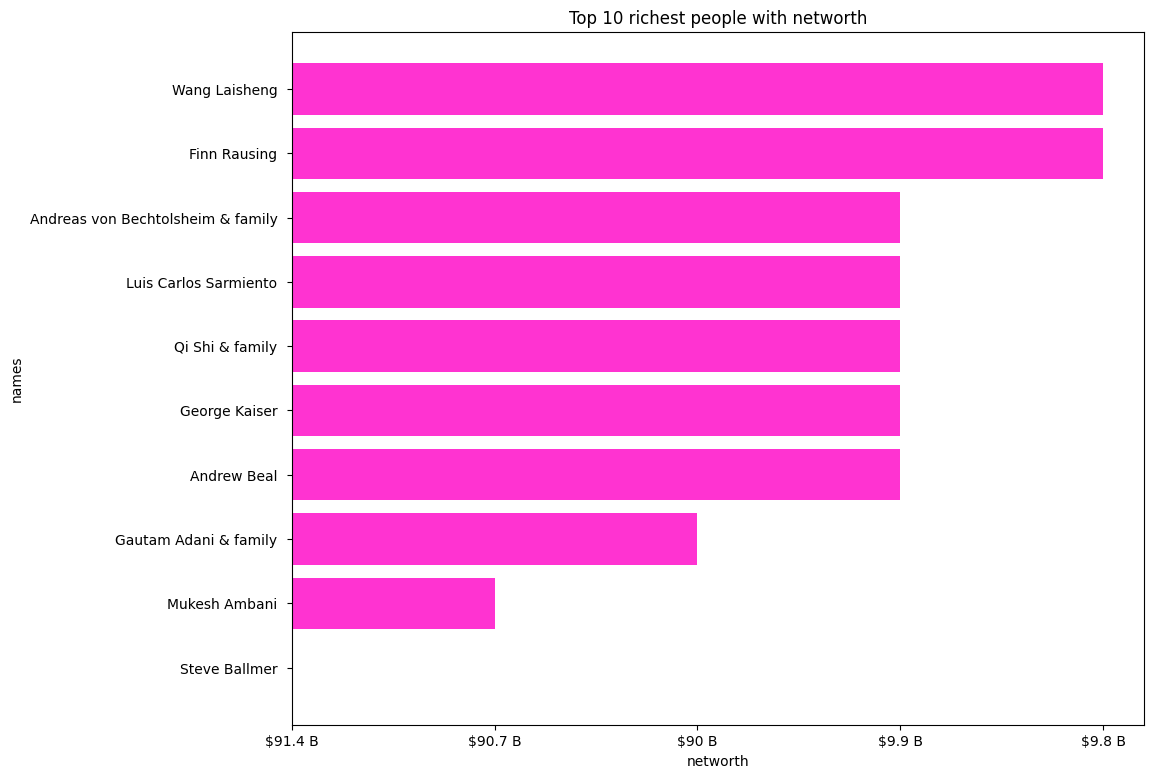

In [60]:
#Show the top 10 Richest people with networth.
top=rich[['name','networth']].sort_values(by='networth', ascending=False).head(10)
plt.figure(figsize=(11,9))
plt.barh(top['name'],top['networth'], color='#ff33D1')
plt.title("Top 10 richest people with networth")
plt.xlabel("networth")
plt.ylabel("names")
plt.show()

<BarContainer object of 10 artists>

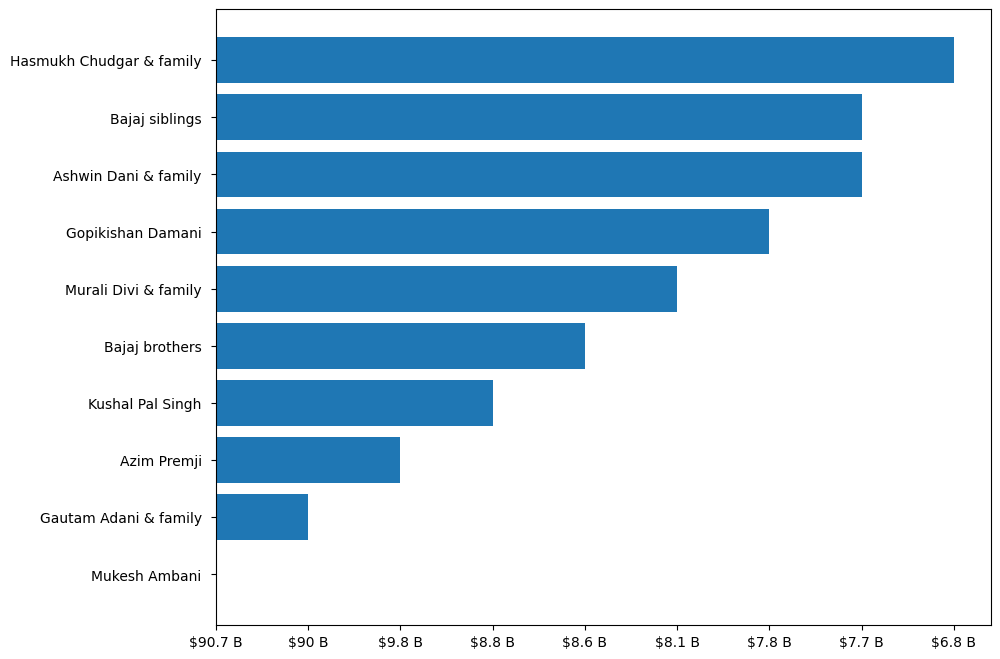

In [61]:
#Show the richest people from India with the names in any plot.
var=rich[rich['country']=='India']
var10=var.sort_values(by='networth', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.barh(var10['name'],var10['networth'])


In [62]:
#Show the minimum age billionaire <=50 with name and industry.
billionaires = rich[(rich['age'] <= 50) ]
print(billionaires[['name', 'age', 'industry']].reset_index())


     index                   name  age                industry
0        0             Elon Musk    50             Automotive 
1        5            Larry Page    49             Technology 
2        6           Sergey Brin    48             Technology 
3       14       Mark Zuckerberg    37             Technology 
4       19        Changpeng Zhao    44  Finance & Investments 
..     ...                    ...  ...                     ...
354   2567         Vlad Yatsenko    38  Finance & Investments 
355   2570               Yu Rong    50             Healthcare 
356   2579         Johanna Braun    42             Healthcare 
357   2580  Karl Friedrich Braun    39             Healthcare 
358   2587           Doug Clarke    41             Technology 

[359 rows x 4 columns]


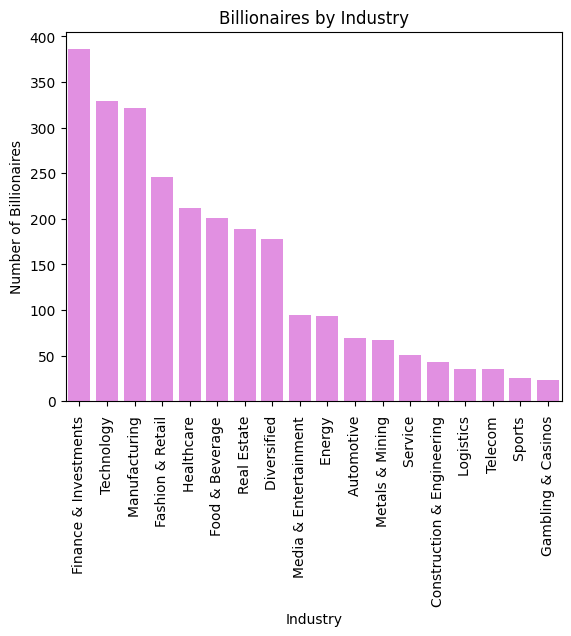

In [63]:
#Show in which industry billionaires are more?
Industry = rich['industry'].value_counts()
sns.barplot(x=Industry.index, y=Industry.values, color='violet')
plt.title('Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=90)
plt.show()